In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bi.csv", encoding='latin-1')

In [3]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [4]:
df.shape

(77, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [6]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [7]:
dups=df.duplicated()
print(dups.sum())

0


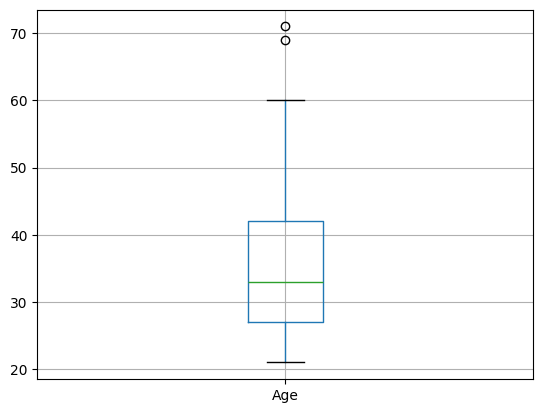

In [8]:
df.boxplot(column=['Age'])
plt.show()

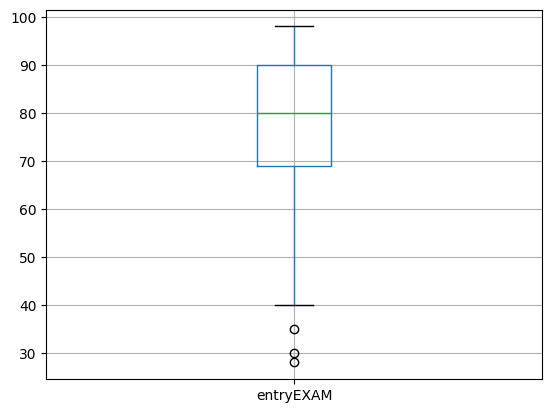

In [9]:
df.boxplot(column=['entryEXAM'])
plt.show()

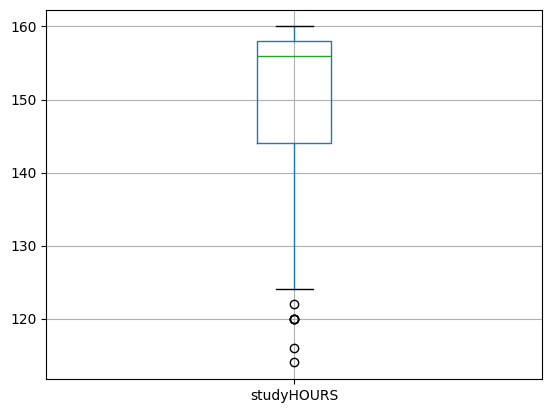

In [10]:
df.boxplot(column=['studyHOURS'])
plt.show()

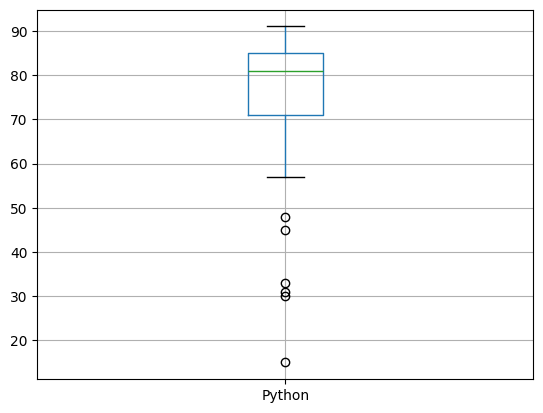

In [11]:
df.boxplot(column=['Python'])
plt.show()

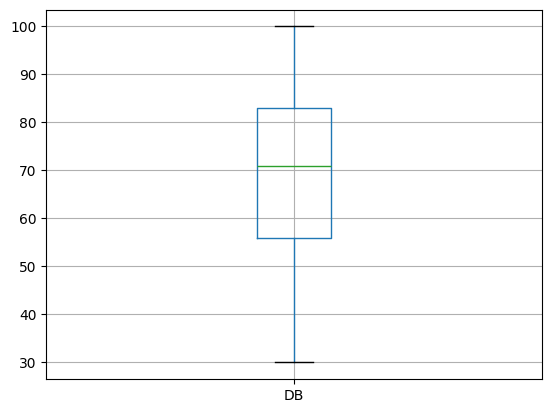

In [12]:
df.boxplot(column=['DB'])
plt.show()

In [13]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [14]:
lr,ur=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']<lr,lr,df['Age'])
df['Age']=np.where(df['Age']>ur,ur,df['Age'])

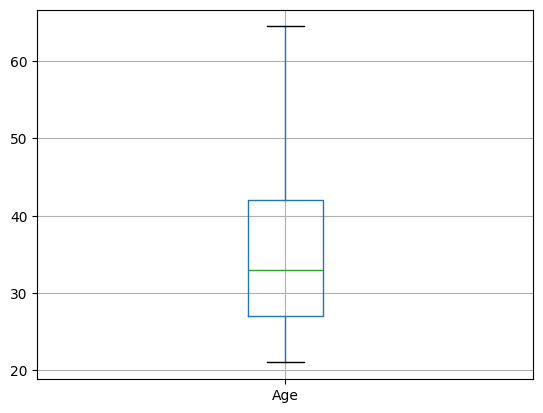

In [15]:
df.boxplot(column=['Age'])
plt.show()

In [16]:
lr,ur=remove_outlier(df['entryEXAM'])
df['entryEXAM']=np.where(df['entryEXAM']<lr,lr,df['entryEXAM'])
df['entryEXAM']=np.where(df['entryEXAM']>ur,ur,df['entryEXAM'])

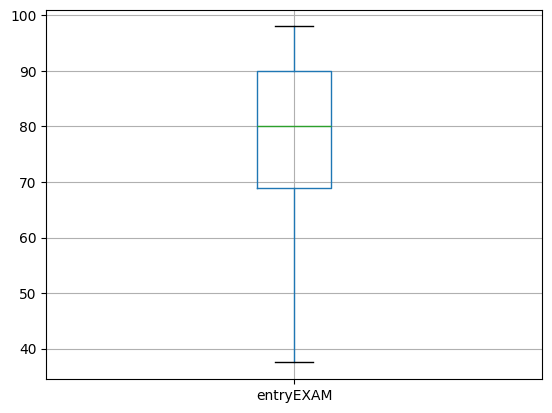

In [17]:
df.boxplot(column=['entryEXAM'])
plt.show()

In [18]:
lr,ur=remove_outlier(df['studyHOURS'])
df['studyHOURS']=np.where(df['studyHOURS']<lr,lr,df['studyHOURS'])
df['studyHOURS']=np.where(df['studyHOURS']>ur,ur,df['studyHOURS'])

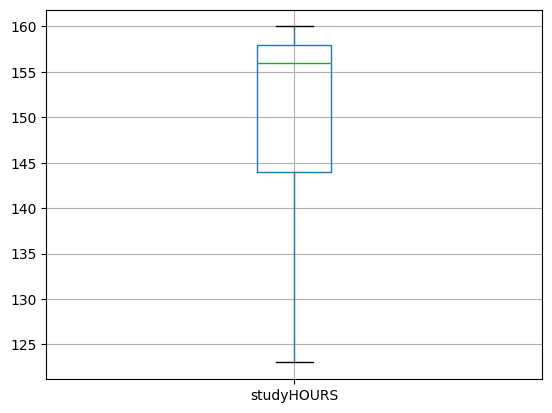

In [19]:
df.boxplot(column=['studyHOURS'])
plt.show()

In [20]:
lr,ur=remove_outlier(df['Python'])
df['Python']=np.where(df['Python']<lr,lr,df['Python'])
df['Python']=np.where(df['Python']>ur,ur,df['Python'])

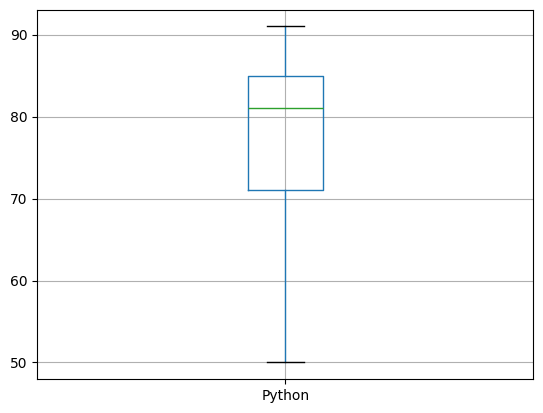

In [21]:
df.boxplot(column=['Python'])
plt.show()

In [22]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [25]:
df["Python"].fillna(median, inplace=True)

/var/folders/k1/7b6hb4293r98k14ntz2sw91c0000gn/T/ipykernel_2360/2417172903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Python"].fillna(median, inplace=True)


In [26]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

In [27]:
sns.displot(df['Python'],bins=10)

In [29]:
sns.displot(df['DB'],bins=10)

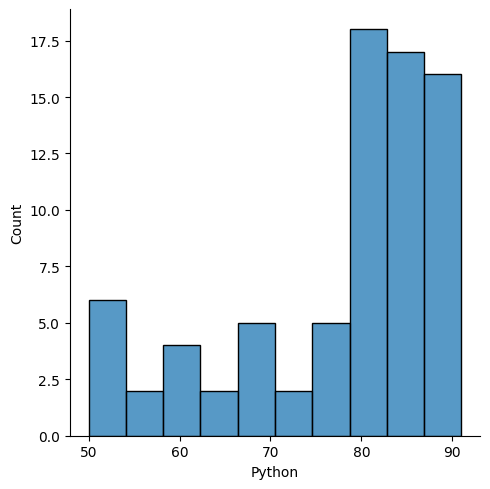

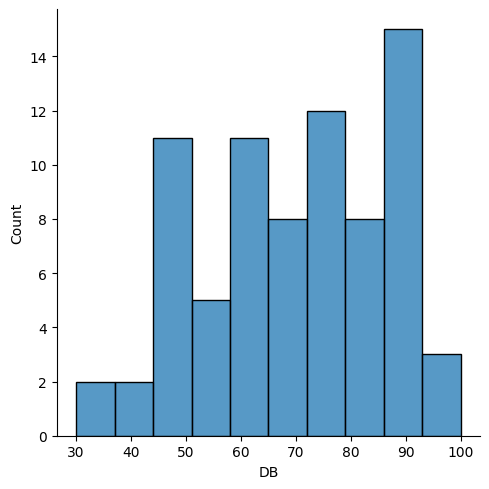

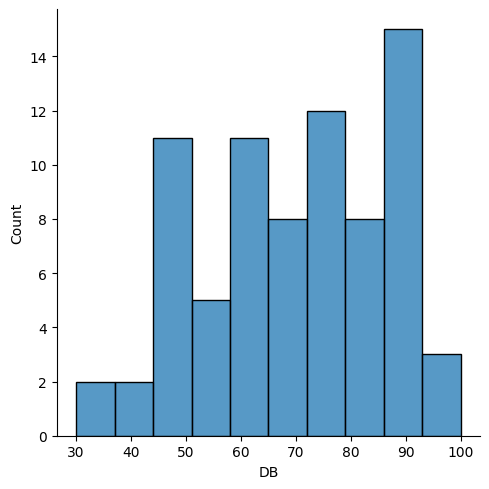

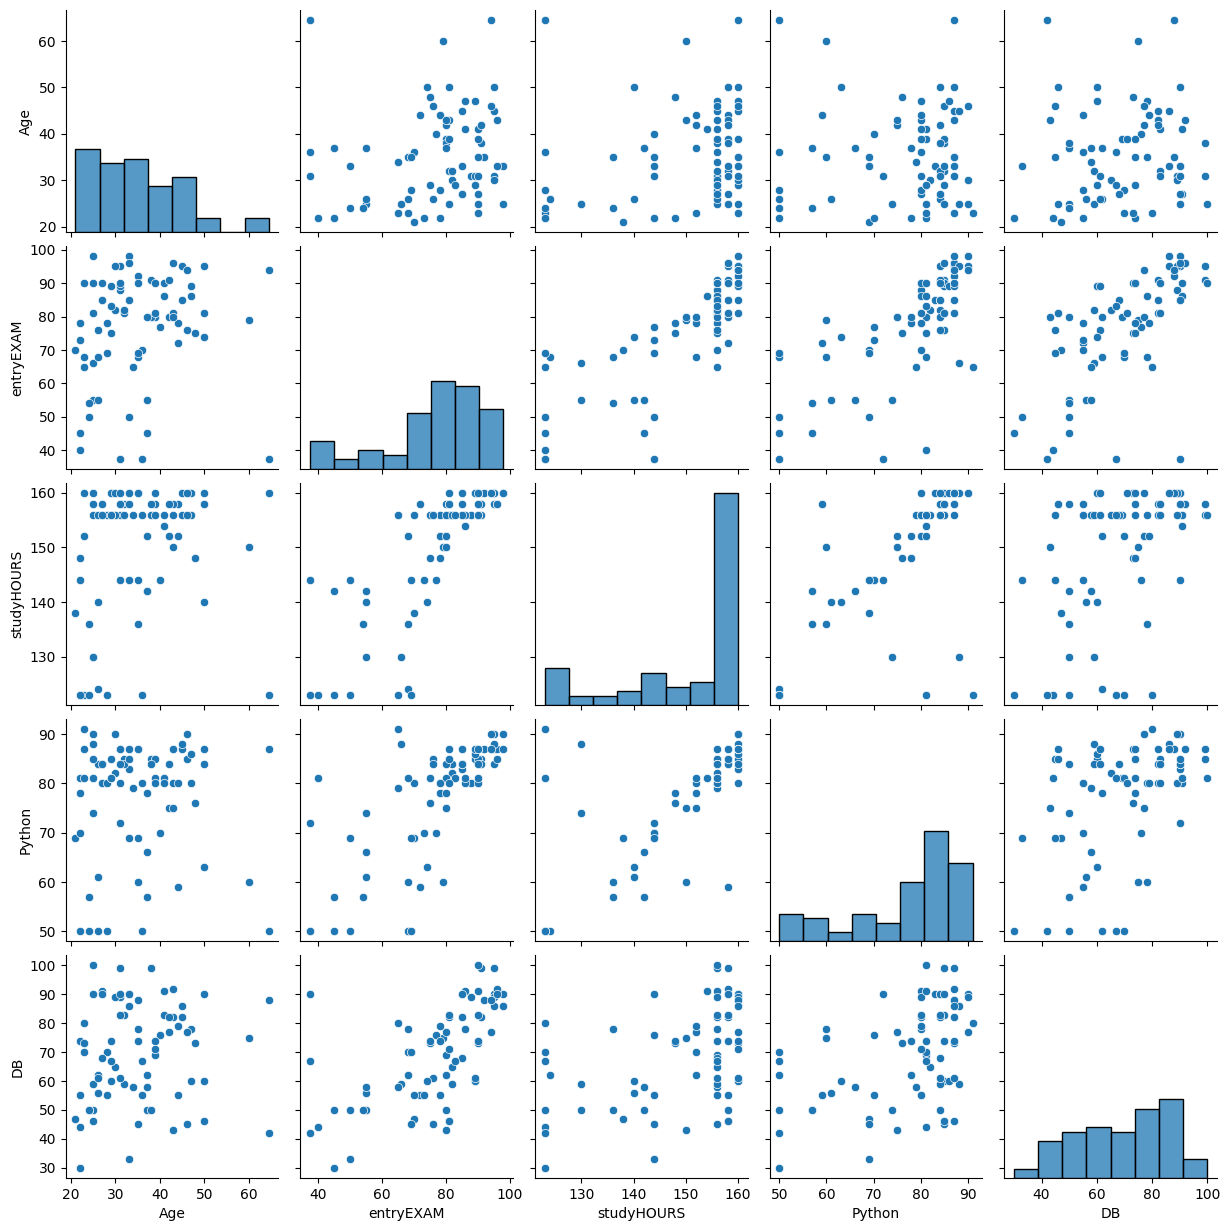

In [30]:
sns.pairplot(df)
plt.show()

In [31]:
num_df = df.select_dtypes(include=np.number)
num_df.corr()

,Age,entryEXAM,studyHOURS,Python,DB
Age,1.000000,0.181159,0.239450,0.004181,0.111532
entryEXAM,0.181159,1.000000,0.812445,0.724357,0.626291
studyHOURS,0.239450,0.812445,1.000000,0.738857,0.462954
Python,0.004181,0.724357,0.738857,1.000000,0.462599
DB,0.111532,0.626291,0.462954,0.462599,1.000000


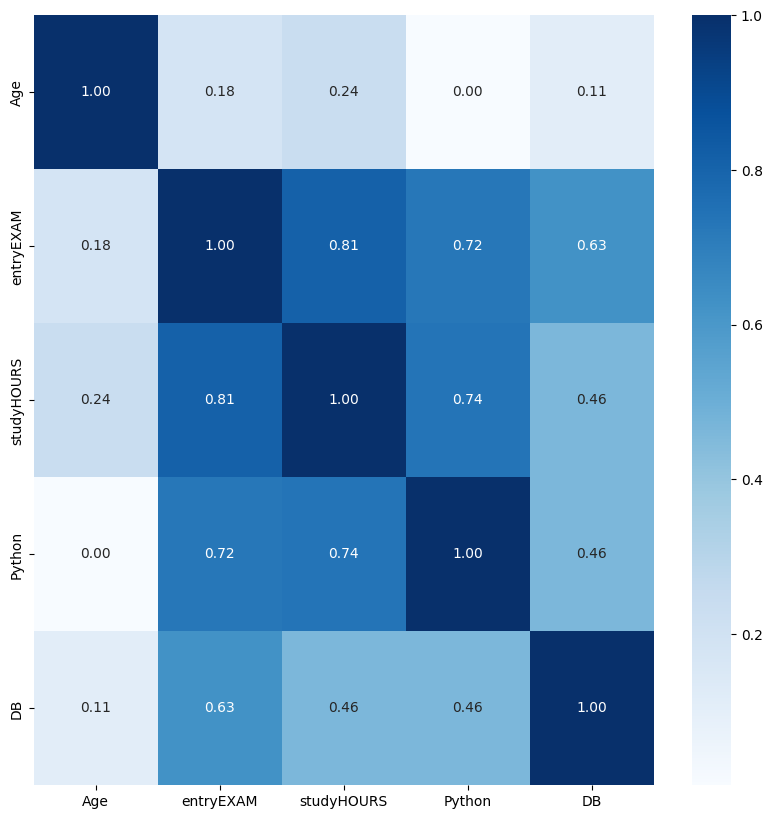

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale

StandardScaler()

In [34]:
df['Age']=std_scale.fit_transform(df[['Age']])
df['entryEXAM']=std_scale.fit_transform(df[['entryEXAM']])
df['studyHOURS']=std_scale.fit_transform(df[['studyHOURS']])
df['Python']=std_scale.fit_transform(df[['Python']])
df['DB']=std_scale.fit_transform(df[['DB']])

In [35]:
num_df = df.select_dtypes(include=np.number)
num_df.corr()

,Age,entryEXAM,studyHOURS,Python,DB
Age,1.000000,0.181159,0.239450,0.004181,0.111532
entryEXAM,0.181159,1.000000,0.812445,0.724357,0.626291
studyHOURS,0.239450,0.812445,1.000000,0.738857,0.462954
Python,0.004181,0.724357,0.738857,1.000000,0.462599
DB,0.111532,0.626291,0.462954,0.462599,1.000000
